In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin

class KMeans:
    def __init__(self, n_clusters=3, max_iter=100, tol=1e-4, random_state=None):
        """
        初始化KMeans类
        :param n_clusters: 聚类数量，默认为3
        :param max_iter: 最大迭代次数，默认为100
        :param tol: 收敛阈值，默认为1e-4
        :param random_state: 随机种子，用于初始化聚类中心
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centers = None  # 聚类中心

    def fit(self, X):
        """
        训练模型，找到聚类中心
        :param X: 输入数据，形状为(n_samples, n_features)
        """
        # 设置随机种子
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # 初始化聚类中心，随机选择n_clusters个样本作为初始聚类中心
        n_samples, n_features = X.shape
        centers_idx = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centers = X[centers_idx]

        # 迭代更新聚类中心
        for i in range(self.max_iter):
            # 分配每个样本到最近的聚类中心
            labels = self.predict(X)

            # 计算新的聚类中心
            new_centers = np.zeros_like(self.centers)
            for j in range(self.n_clusters):
                # 找到属于第j个聚类的样本
                cluster_samples = X[labels == j]
                # 如果没有样本属于该聚类，保持原聚类中心
                if len(cluster_samples) == 0:
                    new_centers[j] = self.centers[j]
                else:
                    new_centers[j] = cluster_samples.mean(axis=0)

            # 检查是否收敛
            if np.linalg.norm(new_centers - self.centers) < self.tol:
                break

            # 更新聚类中心
            self.centers = new_centers

    def predict(self, X):
        """
        预测每个样本所属的聚类
        :param X: 输入数据，形状为(n_samples, n_features)
        :return: 样本所属的聚类标签，形状为(n_samples,)
        """
        # 计算每个样本到各个聚类中心的距离，并找到最近的聚类中心
        distances = pairwise_distances_argmin(X, self.centers, metric='euclidean')
        return distances

    def get_centers(self):
        """
        获取聚类中心
        :return: 聚类中心，形状为(n_clusters, n_features)
        """
        return self.centers

聚类中心：
[[-0.01139555 -0.87600831  0.37707573  0.31115341]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.16743407  0.14530299  1.00302557  1.0300019 ]]
轮廓系数：0.463


D:\python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\python\Lib\site-packages\IP

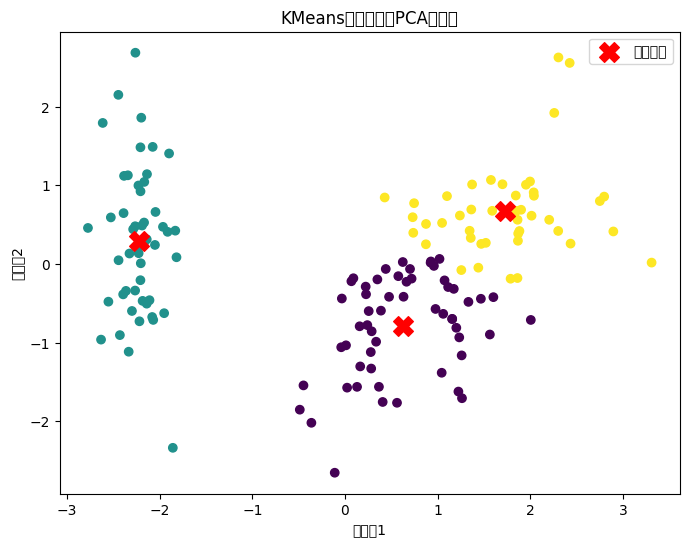

In [9]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 加载iris数据集
iris = load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 创建KMeans实例
kmeans = KMeans(n_clusters=3, max_iter=100, tol=1e-4, random_state=42)

# 训练模型
kmeans.fit(X_scaled)

# 获取聚类结果
labels = kmeans.predict(X_scaled)
centers = kmeans.get_centers()

# 输出聚类中心
print("聚类中心：")
print(centers)

# 计算轮廓系数评估聚类效果
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"轮廓系数：{silhouette_avg:.3f}")

# 可视化聚类结果（以二维为例，使用PCA降维）
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 使用PCA将数据降维到2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 绘制聚类结果
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(pca.transform(centers)[:, 0], pca.transform(centers)[:, 1], 
            marker='X', s=200, c='red', label='聚类中心')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.title('KMeans聚类结果（PCA降维）')
plt.legend()
plt.show()

In [ ]:
第一章：机器学习概述
机器学习定义：使用算法分析数据，从数据中学习，然后对新数据做出判断或预测。
与传统编程的区别：传统编程是编写明确的指令让计算机执行任务，而机器学习是通过数据训练让机器自动学习完成任务的方法。
机器学习的应用场景：如垃圾邮件过滤、情感分析、主题分类等。
第二章：深度学习简介
深度学习定义：是机器学习的一个分支，利用具有多个层次的人工神经网络来模拟和学习数据中的复杂模式。
深度学习的特点：能够自动提取数据特征，对大量数据进行有效学习，适用于图像、语音、自然语言等多种类型的数据。
深度学习的应用领域：图像处理（如图像分类、物体检测等）、语音识别（如语音识别、声纹识别等）、自然语言处理（如语言模型、情感分析等）。
第三章：神经网络基础
神经网络的组成：由输入层、隐藏层和输出层构成，通过调整节点之间的连接关系来处理信息。
神经网络的工作原理：输入数据经过各层的转换和处理，最终在输出层得到预测结果。
神经网络的优势：具有自学习和自适应能力，能够处理复杂的非线性关系。
第四章：人工神经网络（ANN）
ANN的定义：模仿动物神经网络行为特征，进行分布式并行信息处理的算法数学模型。
ANN的结构：包括输入层、隐藏层和输出层，各层之间通过权重连接。
ANN的学习过程：通过调整权重和偏置，使网络的输出与实际值之间的误差最小化。
第五章：训练神经网络
训练数据的准备：收集和预处理大量有代表性的数据，进行数据清洗、归一化等操作。
损失函数的选择：根据任务类型选择合适的损失函数，如均方误差、交叉熵等，用于衡量预测值与实际值之间的差异。
优化算法的应用：使用梯度下降等优化算法，根据损失函数的梯度调整网络的参数，以最小化损失。
第六章：数据相关主题
数据集的获取与整理：从各种渠道获取数据，并进行清洗、标注等处理，使其适合用于训练神经网络。
数据增强技术：通过旋转、翻转、裁剪等操作增加数据的多样性，提高模型的泛化能力。
数据预处理方法：如归一化、标准化等，使数据符合模型的输入要求，加快训练速度。
第七章：过拟合与欠拟合
过拟合的概念：模型在训练数据上表现很好，但在新数据上表现不佳，因为模型过于复杂，学习了训练数据中的噪声和细节。
欠拟合的概念：模型在训练数据上和新数据上都表现不好，因为模型过于简单，无法捕捉数据中的有效信息。
解决过拟合和欠拟合的方法：如增加数据量、调整模型复杂度、使用正则化技术等。
第八章：监督学习、无监督学习和半监督学习
监督学习：利用有标签的数据进行训练，学习输入数据与标签之间的映射关系，如分类和回归任务。
无监督学习：处理无标签的数据，发现数据中的内在结构和模式，如聚类、降维等。
半监督学习：结合少量有标签数据和大量无标签数据进行学习，在数据标签获取困难的情况下提高模型性能。
第九章：卷积神经网络（CNN）
CNN的结构：包含卷积层、池化层、全连接层等，通过卷积操作提取图像的局部特征。
卷积层的作用：使用卷积核在图像上滑动，进行卷积运算，得到特征图，突出图像的某些特征。
池化层的功能：对特征图进行下采样，减少数据量，同时保留重要特征，常用的有最大池化、平均池化等。
第十章：反向传播（Backpropagation）
反向传播的原理：通过计算损失函数对网络中各层权重的梯度，从输出层向输入层反向传播误差，调整权重以优化模型。
梯度下降算法：根据梯度方向更新权重，逐步减小损失函数的值，常见的有随机梯度下降、批量梯度下降等。
反向传播的应用：是训练神经网络的核心算法，能够有效地调整网络参数，提高模型的准确性和性能。
